In [1]:
##importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
BIG_SIZE = 12

In [2]:
# for creating LinearRegression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
# for creating keras model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [4]:
df1 = pd.read_csv("house_price_data.csv")
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Exploratory data analysis

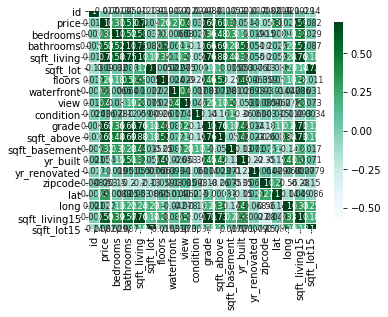

In [5]:
import seaborn as sns
sns.heatmap(df1.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},cbar_kws={"shrink": .9});

In [6]:
price_corr = df1.corr()['price'].sort_values(ascending=False)
print(price_corr)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Floors'),
 Text(0.5, 1.0, 'Floors vs Price Box Plot')]

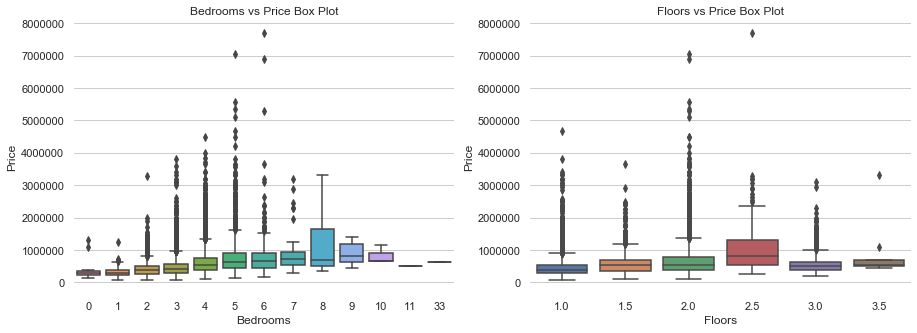

In [7]:
sns.set(style="whitegrid", font_scale=1)

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df1['bedrooms'],y=df1['price'], ax=axes[0])
sns.boxplot(x=df1['floors'],y=df1['price'], ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price', title='Bedrooms vs Price Box Plot')
axes[1].set(xlabel='Floors', ylabel='Price', title='Floors vs Price Box Plot')

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Grade'),
 Text(0.5, 1.0, 'Grade vs Price Box Plot')]

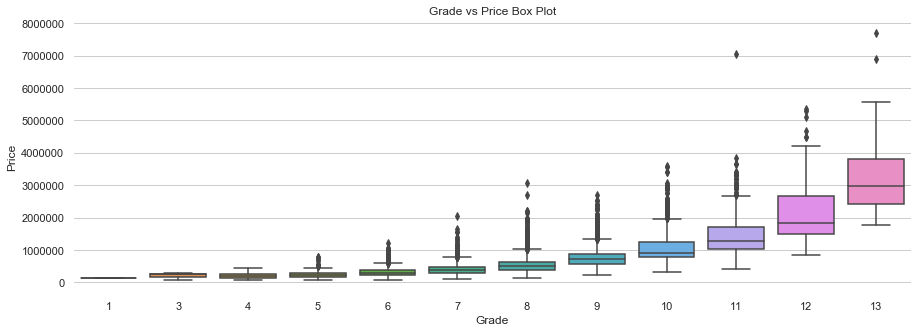

In [8]:
f, axe = plt.subplots(1, 1,figsize=(15,5))
sns.boxplot(x=df1['grade'],y=df1['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.set(xlabel='Grade', ylabel='Price', title='Grade vs Price Box Plot')

In [9]:
df1['date'] = pd.to_datetime(df1['date'])
df1['month'] = df1['date'].apply(lambda date:date.month)
df1['year'] = df1['date'].apply(lambda date:date.year)

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'Month'), Text(0.5, 1.0, 'Price Trends')]

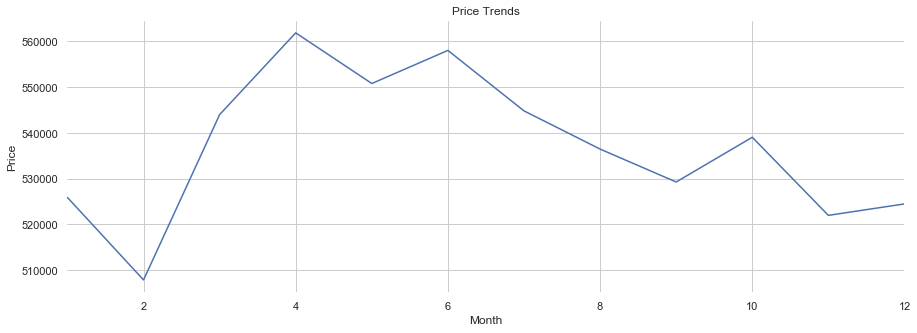

In [10]:
f, axe = plt.subplots(1, 1,figsize=(15,5))
df1.groupby('month').mean()['price'].plot()
sns.despine(left=True, bottom=True)
axe.set(xlabel='Month', ylabel='Price', title='Price Trends')

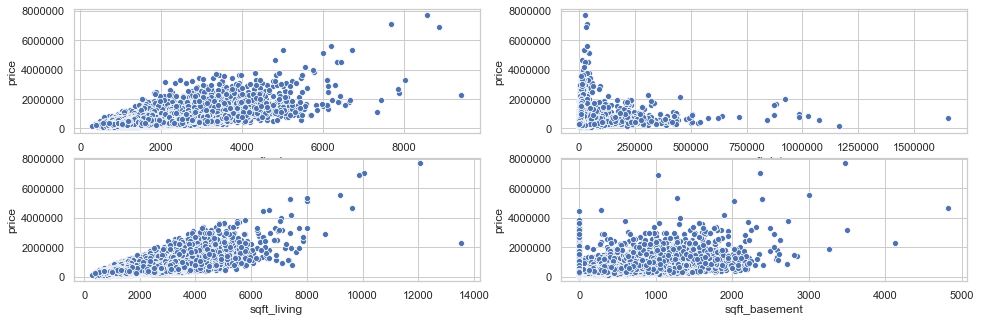

In [11]:
fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(df1['sqft_above'], df1['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(df1['sqft_lot'],df1['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(df1['sqft_living'],df1['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(df1['sqft_basement'],df1['price'])

C:\Users\prith\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  # Remove the CWD from sys.path while we load stuff.


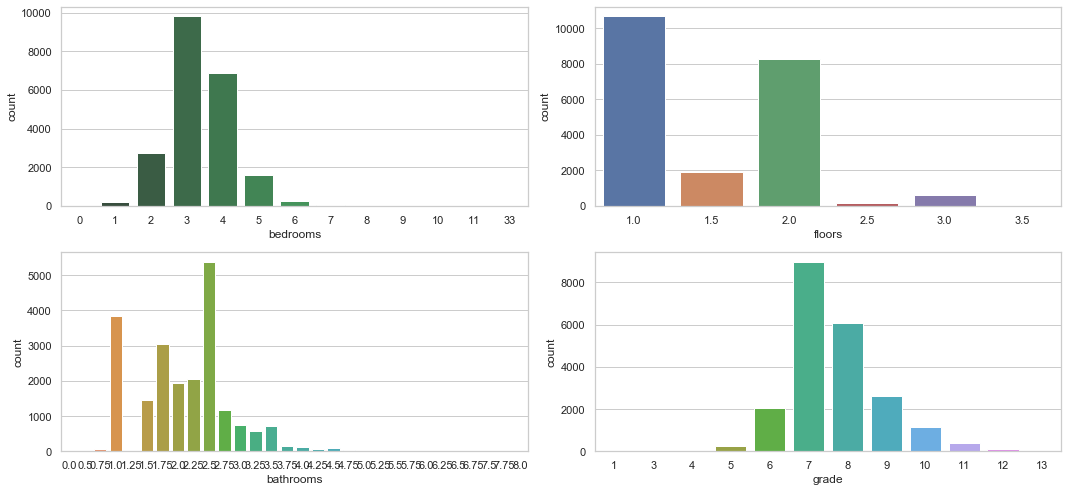

In [12]:
fig = plt.figure(figsize=(15,7),constrained_layout=True)
fig.add_subplot(2,2,1)
sns.countplot(df1['bedrooms'], palette = 'Greens_d')
fig.add_subplot(2,2,2)
sns.countplot(df1['floors'])
fig.add_subplot(2,2,3)
sns.countplot(df1['bathrooms'])
fig.add_subplot(2,2,4)
sns.countplot(df1['grade'])
plt.tight_layout()

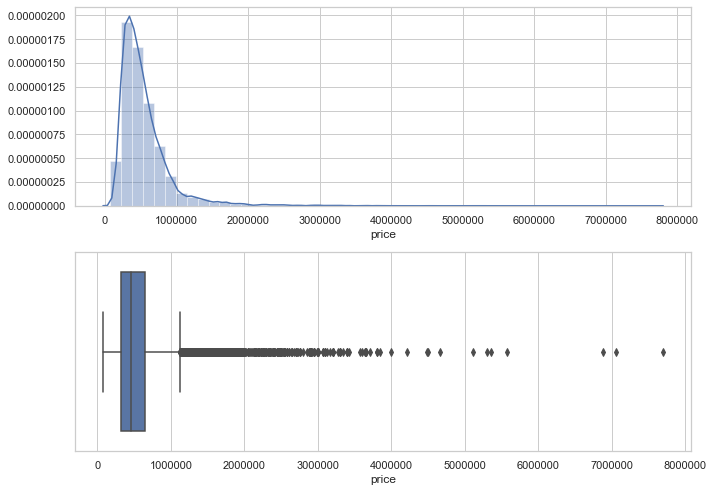

In [13]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df1['price'])
fig.add_subplot(2,1,2)
sns.boxplot(df1['price'])
plt.tight_layout()

In [14]:
df1["total_sqft"] = df1["sqft_living"] + df1["sqft_above"] + df1["sqft_basement"]
df1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,total_sqft
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,2360
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014,5140
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2,2015,1540
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,3920
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,3360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,5,2014,3060
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,2,2015,4620
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,2009,0,98144,47.5944,-122.299,1020,2007,6,2014,2040
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,2004,0,98027,47.5345,-122.069,1410,1287,1,2015,3200


In [15]:
df1.shape

(21613, 24)

In [16]:
df1.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month            0
year             0
total_sqft       0
dtype: int64

In [17]:
df1.drop(['id','date','condition','long','sqft_lot15','sqft_living15','yr_built','sqft_lot','view','waterfront','yr_renovated','lat','sqft_living','sqft_above','sqft_basement'],axis=1,inplace=True)

In [18]:
df1

,price,bedrooms,bathrooms,floors,grade,zipcode,month,year,total_sqft
0,221900.0,3,1.00,1.0,7,98178,10,2014,2360
1,538000.0,3,2.25,2.0,7,98125,12,2014,5140
2,180000.0,2,1.00,1.0,6,98028,2,2015,1540
3,604000.0,4,3.00,1.0,7,98136,12,2014,3920
4,510000.0,3,2.00,1.0,8,98074,2,2015,3360
...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,3.0,8,98103,5,2014,3060
21609,400000.0,4,2.50,2.0,8,98146,2,2015,4620
21610,402101.0,2,0.75,2.0,7,98144,6,2014,2040
21611,400000.0,3,2.50,2.0,8,98027,1,2015,3200


In [19]:
df1 = df1.sort_values("zipcode",ascending=True)
df1 = df1.reset_index(drop=True)
df1

,price,bedrooms,bathrooms,floors,grade,zipcode,month,year,total_sqft
0,299999.0,3,2.50,2.0,8,98001,4,2015,4760
1,460000.0,3,2.50,2.0,8,98001,12,2014,5440
2,295000.0,3,2.50,1.0,7,98001,4,2015,3880
3,269500.0,4,2.25,2.0,7,98001,12,2014,3400
4,254999.0,3,1.00,1.0,7,98001,4,2015,3160
...,...,...,...,...,...,...,...,...,...
21608,812000.0,4,2.00,1.0,8,98199,5,2015,4760
21609,535000.0,2,2.00,1.5,7,98199,9,2014,3020
21610,700000.0,4,1.75,1.0,8,98199,4,2015,3740
21611,554729.0,4,2.50,2.0,9,98199,7,2014,4040


## Visualizing Outliers

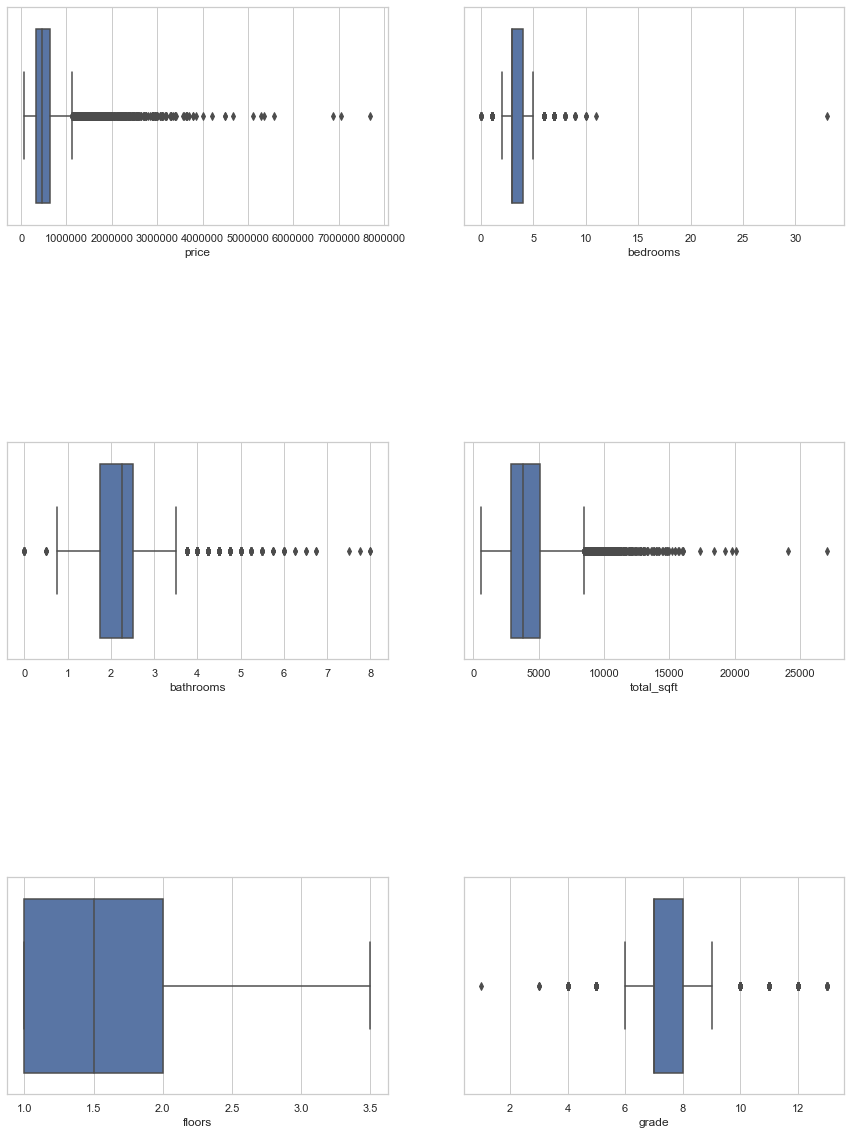

In [20]:
import seaborn as sns
f,ax=plt.subplots(figsize=(15, 20),nrows=3,ncols=2)
plt.subplots_adjust(hspace=1)
## Features
sns.boxplot(df1['price'],data=df1,ax=ax[0][0])
sns.boxplot(df1['bedrooms'],data=df1,ax=ax[0][1])
sns.boxplot(df1['bathrooms'],data=df1,ax=ax[1][0])
sns.boxplot(df1['total_sqft'],data=df1,ax=ax[1][1])
sns.boxplot(df1['floors'],data=df1,ax=ax[2][0])
sns.boxplot(df1['grade'],data=df1,ax=ax[2][1])
#sns.boxplot(df1['sqft_basement'],data=df1,ax=ax[3][1])

### Looks like except floors and lat, other columns have outliers

In [21]:
def remove_price_outliers(df):
    Q1 = df.price.quantile(0.25)
    Q3 = df.price.quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    df.price = np.where(df.price>upper_limit,upper_limit,df.price)
    df.price = np.where(df.price<lower_limit,lower_limit,df.price)
    return df
df1 = remove_price_outliers(df1)
df1.shape

(21613, 9)

In [22]:
def remove_bedrooms_outliers(df):
    Q1 = df.bedrooms.quantile(0.25)
    Q3 = df.bedrooms.quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    df.bedrooms = np.where(df.bedrooms>upper_limit,upper_limit,df.bedrooms)
    df.bedrooms = np.where(df.bedrooms<lower_limit,lower_limit,df.bedrooms)
    return df
df1 = remove_bedrooms_outliers(df1)
df1.shape

(21613, 9)

In [23]:
def remove_bathrooms_outliers(df):
    Q1 = df.bathrooms.quantile(0.25)
    Q3 = df.bathrooms.quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    df.bathrooms = np.where(df.bathrooms>upper_limit,upper_limit,df.bathrooms)
    df.bathrooms = np.where(df.bathrooms<lower_limit,lower_limit,df.bathrooms)
    return df
df1 = remove_bathrooms_outliers(df1)
df1.shape

(21613, 9)

In [24]:
def remove_total_sqft_outliers(df):
    Q1 = df.total_sqft.quantile(0.25)
    Q3 = df.total_sqft.quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    df.total_sqft = np.where(df.total_sqft>upper_limit,upper_limit,df.total_sqft)
    df.total_sqft = np.where(df.total_sqft<lower_limit,lower_limit,df.total_sqft)
    return df
df1 = remove_total_sqft_outliers(df1)
df1.shape

(21613, 9)

In [25]:
def remove_floors_outliers(df):
    Q1 = df.floors.quantile(0.25)
    Q3 = df.floors.quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    df.floors = np.where(df.floors>upper_limit,upper_limit,df.floors)
    df.floors = np.where(df.floors<lower_limit,lower_limit,df.floors)
    return df
df1 = remove_floors_outliers(df1)
df1.shape

(21613, 9)

In [26]:
def remove_grade_outliers(df):
    Q1 = df.grade.quantile(0.25)
    Q3 = df.grade.quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    df.grade = np.where(df.grade>upper_limit,upper_limit,df.grade)
    df.grade = np.where(df.grade<lower_limit,lower_limit,df.grade)
    return df
df1 = remove_grade_outliers(df1)
df1.shape

(21613, 9)

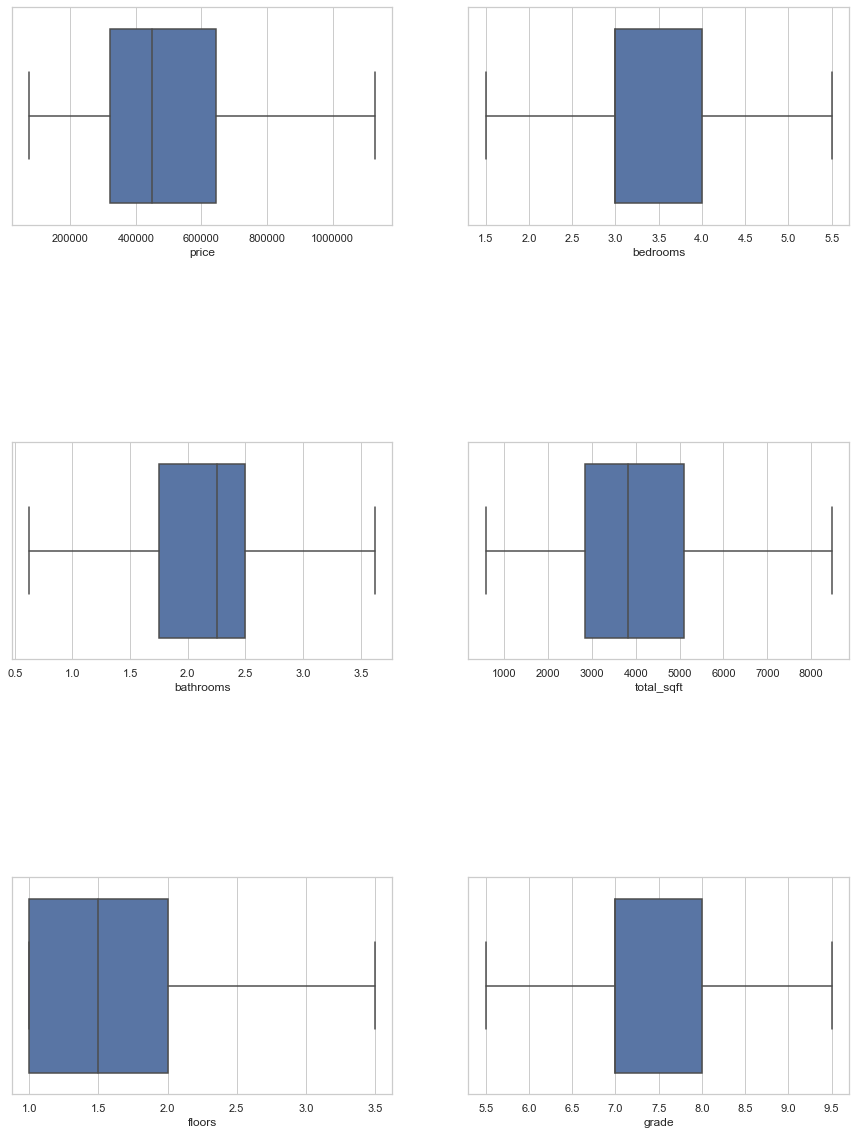

In [27]:
f,ax=plt.subplots(figsize=(15, 20),nrows=3,ncols=2)
plt.subplots_adjust(hspace=1)
## Features
sns.boxplot(df1['price'],data=df1,ax=ax[0][0])
sns.boxplot(df1['bedrooms'],data=df1,ax=ax[0][1])
sns.boxplot(df1['bathrooms'],data=df1,ax=ax[1][0])
sns.boxplot(df1['total_sqft'],data=df1,ax=ax[1][1])
sns.boxplot(df1['floors'],data=df1,ax=ax[2][0])
sns.boxplot(df1['grade'],data=df1,ax=ax[2][1])
#sns.boxplot(df1['sqft_basement'],data=df1,ax=ax[3][1])

In [28]:
dummies = pd.get_dummies(df1.zipcode)
dummies

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
df1 = pd.concat([df1,dummies],axis='columns')
df1

,price,bedrooms,bathrooms,floors,grade,zipcode,month,year,total_sqft,98001,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,299999.0,3.0,2.50,2.0,8.0,98001,4,2015,4760.0,1,...,0,0,0,0,0,0,0,0,0,0
1,460000.0,3.0,2.50,2.0,8.0,98001,12,2014,5440.0,1,...,0,0,0,0,0,0,0,0,0,0
2,295000.0,3.0,2.50,1.0,7.0,98001,4,2015,3880.0,1,...,0,0,0,0,0,0,0,0,0,0
3,269500.0,4.0,2.25,2.0,7.0,98001,12,2014,3400.0,1,...,0,0,0,0,0,0,0,0,0,0
4,254999.0,3.0,1.00,1.0,7.0,98001,4,2015,3160.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,812000.0,4.0,2.00,1.0,8.0,98199,5,2015,4760.0,0,...,0,0,0,0,0,0,0,0,0,1
21609,535000.0,2.0,2.00,1.5,7.0,98199,9,2014,3020.0,0,...,0,0,0,0,0,0,0,0,0,1
21610,700000.0,4.0,1.75,1.0,8.0,98199,4,2015,3740.0,0,...,0,0,0,0,0,0,0,0,0,1
21611,554729.0,4.0,2.50,2.0,9.0,98199,7,2014,4040.0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
df1 = df1.drop('zipcode',axis='columns')
df1

,price,bedrooms,bathrooms,floors,grade,month,year,total_sqft,98001,98002,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,299999.0,3.0,2.50,2.0,8.0,4,2015,4760.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,460000.0,3.0,2.50,2.0,8.0,12,2014,5440.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,295000.0,3.0,2.50,1.0,7.0,4,2015,3880.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,269500.0,4.0,2.25,2.0,7.0,12,2014,3400.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,254999.0,3.0,1.00,1.0,7.0,4,2015,3160.0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,812000.0,4.0,2.00,1.0,8.0,5,2015,4760.0,0,0,...,0,0,0,0,0,0,0,0,0,1
21609,535000.0,2.0,2.00,1.5,7.0,9,2014,3020.0,0,0,...,0,0,0,0,0,0,0,0,0,1
21610,700000.0,4.0,1.75,1.0,8.0,4,2015,3740.0,0,0,...,0,0,0,0,0,0,0,0,0,1
21611,554729.0,4.0,2.50,2.0,9.0,7,2014,4040.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
df1.grade.unique()

array([8. , 7. , 9. , 6. , 5.5, 9.5])

In [32]:
df1.bedrooms.unique()

array([3. , 4. , 2. , 5. , 1.5, 5.5])

In [33]:
df1.columns

Index([     'price',   'bedrooms',  'bathrooms',     'floors',      'grade',
            'month',       'year', 'total_sqft',        98001,        98002,
              98003,        98004,        98005,        98006,        98007,
              98008,        98010,        98011,        98014,        98019,
              98022,        98023,        98024,        98027,        98028,
              98029,        98030,        98031,        98032,        98033,
              98034,        98038,        98039,        98040,        98042,
              98045,        98052,        98053,        98055,        98056,
              98058,        98059,        98065,        98070,        98072,
              98074,        98075,        98077,        98092,        98102,
              98103,        98105,        98106,        98107,        98108,
              98109,        98112,        98115,        98116,        98117,
              98118,        98119,        98122,        98125,        98126,

In [34]:
model = []
score = []

model_pred = []
score_pred = []

X=df1.drop(['price'],axis='columns')
y=df1['price']

In [35]:
X

,bedrooms,bathrooms,floors,grade,month,year,total_sqft,98001,98002,98003,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,3.0,2.50,2.0,8.0,4,2015,4760.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.50,2.0,8.0,12,2014,5440.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.50,1.0,7.0,4,2015,3880.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,2.25,2.0,7.0,12,2014,3400.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,1.00,1.0,7.0,4,2015,3160.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,4.0,2.00,1.0,8.0,5,2015,4760.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21609,2.0,2.00,1.5,7.0,9,2014,3020.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21610,4.0,1.75,1.0,8.0,4,2015,3740.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21611,4.0,2.50,2.0,9.0,7,2014,4040.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
X.columns

Index([  'bedrooms',  'bathrooms',     'floors',      'grade',      'month',
             'year', 'total_sqft',        98001,        98002,        98003,
              98004,        98005,        98006,        98007,        98008,
              98010,        98011,        98014,        98019,        98022,
              98023,        98024,        98027,        98028,        98029,
              98030,        98031,        98032,        98033,        98034,
              98038,        98039,        98040,        98042,        98045,
              98052,        98053,        98055,        98056,        98058,
              98059,        98065,        98070,        98072,        98074,
              98075,        98077,        98092,        98102,        98103,
              98105,        98106,        98107,        98108,        98109,
              98112,        98115,        98116,        98117,        98118,
              98119,        98122,        98125,        98126,        98133,

In [37]:
y

0        299999.0
1        460000.0
2        295000.0
3        269500.0
4        254999.0
           ...   
21608    812000.0
21609    535000.0
21610    700000.0
21611    554729.0
21612    850000.0
Name: price, Length: 21613, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17290, 77)
(4323, 77)
(17290,)
(4323,)


## Linear Regression Model

In [40]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8361294479478972

In [41]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.83612945, 0.83085278, 0.84379811, 0.82884134, 0.82795642])

Text(0.5, 1.0, 'Prediction with test features in LinearRegression')

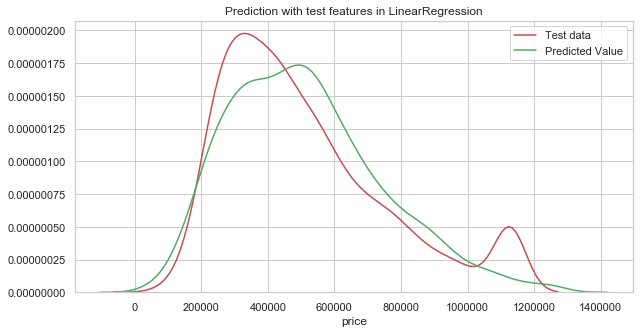

In [59]:
#LinearRegression
LinReg_pred=lr_clf.predict(X_test)

model_pred.append("Linear Regression")
score_pred.append(r2_score(y_test,LinReg_pred))

#Visualisation
f,ax=plt.subplots(figsize=(10, 5))
ax=sns.distplot(y_test,hist=False,label='Test data',color='r')
sns.distplot(LinReg_pred,hist=False,label='Predicted Value',color='g',ax=ax)
plt.title("Prediction with test features in LinearRegression") 

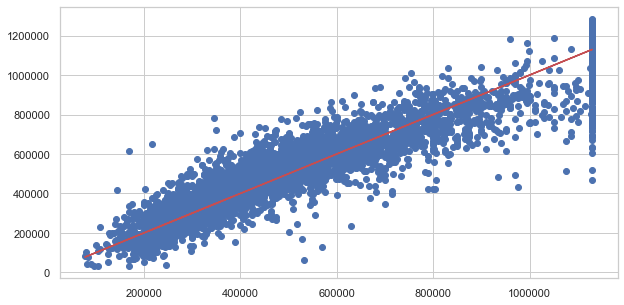

In [61]:
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,LinReg_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [43]:
ln_y_test = np.array(y_test).reshape(-1, 1)
print(len(y_test))
y_test

4323


17384     380000.0
722       358000.0
2680      300000.0
18754     412000.0
14554    1015000.0
           ...    
5427      529000.0
16547     390000.0
4585      550000.0
17762     350000.0
16323     210000.0
Name: price, Length: 4323, dtype: float64

In [44]:
LinReg_pred

array([543841.66796875, 412704.17578125, 314946.15234375, ...,
       557000.20117188, 482904.77929688, 245127.09375   ])

In [45]:
#lr_clf.score(y_test, LinReg_pred)
metrics.explained_variance_score(ln_y_test,LinReg_pred)

0.8361595494405539

In [46]:
np.where(X.columns==98002)[0][0]

8

In [47]:
def predict_price(location,sqft,bath,bhk,floor,grade):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bhk
    x[1] = bath
    x[2] = floor
    x[3] = grade
    x[4] = sqft
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [48]:
df1.head()

,price,bedrooms,bathrooms,floors,grade,month,year,total_sqft,98001,98002,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,299999.0,3.0,2.50,2.0,8.0,4,2015,4760.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,460000.0,3.0,2.50,2.0,8.0,12,2014,5440.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,295000.0,3.0,2.50,1.0,7.0,4,2015,3880.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,269500.0,4.0,2.25,2.0,7.0,12,2014,3400.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,254999.0,3.0,1.00,1.0,7.0,4,2015,3160.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
predict_price(98001,3880.0,3.0,2.50,1.0,7.0)

-51663553.568359375

In [50]:
predict_price(98166, 4000, 3, 3, 2, 7)

-51426986.984375

In [51]:
import pickle
with open('home_price_prediction_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [52]:
import json
columns = {
    'data_columns' : [col for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

 ## Keras ANN Model 

In [53]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [54]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

136/136 [==============================] - 0s 2ms/step - loss: 304961945600.0000 - val_loss: 217885261824.0000
Epoch 2/400
136/136 [==============================] - 0s 1ms/step - loss: 67431383040.0000 - val_loss: 32193748992.0000
Epoch 3/400
136/136 [==============================] - 0s 1ms/step - loss: 32406476800.0000 - val_loss: 32046344192.0000
Epoch 4/400
136/136 [==============================] - 0s 1ms/step - loss: 32261933056.0000 - val_loss: 31934160896.0000
Epoch 5/400
136/136 [=

136/136 [==============================] - 0s 1ms/step - loss: 31369433088.0000 - val_loss: 31069362176.0000
Epoch 63/400
136/136 [==============================] - 0s 1ms/step - loss: 31350335488.0000 - val_loss: 31029602304.0000
Epoch 64/400
136/136 [==============================] - 0s 1ms/step - loss: 31348580352.0000 - val_loss: 31051278336.0000
Epoch 65/400
136/136 [==============================] - 0s 1ms/step - loss: 31377598464.0000 - val_loss: 31027259392.0000
Epoch 66/400
136/136 [==============================] - 0s 1ms/step - loss: 31316680704.0000 - val_loss: 30994898944.0000
Epoch 67/400
136/136 [==============================] - 0s 1ms/step - loss: 31343638528.0000 - val_loss: 31110565888.0000
Epoch 68/400
136/136 [==============================] - 0s 1ms/step - loss: 31262025728.0000 - val_loss: 31156131840.0000
Epoch 69/400
136/136 [==============================] - 0s 1ms/step - loss: 31265894400.0000 - val_loss: 30935289856.0000
Epoch 70/400
136/136 [===============

136/136 [==============================] - 0s 1ms/step - loss: 13586491392.0000 - val_loss: 14389913600.0000
Epoch 130/400
136/136 [==============================] - 0s 1ms/step - loss: 13951364096.0000 - val_loss: 12593982464.0000
Epoch 131/400
136/136 [==============================] - 0s 1ms/step - loss: 13283743744.0000 - val_loss: 14601932800.0000
Epoch 132/400
136/136 [==============================] - 0s 1ms/step - loss: 13197831168.0000 - val_loss: 12418334720.0000
Epoch 133/400
136/136 [==============================] - 0s 1ms/step - loss: 12888146944.0000 - val_loss: 12371524608.0000
Epoch 134/400
136/136 [==============================] - 0s 1ms/step - loss: 12668572672.0000 - val_loss: 11996566528.0000
Epoch 135/400
136/136 [==============================] - 0s 1ms/step - loss: 12512024576.0000 - val_loss: 12227132416.0000
Epoch 136/400
136/136 [==============================] - 0s 1ms/step - loss: 12749100032.0000 - val_loss: 14750427136.0000
Epoch 137/400
136/136 [=======

Epoch 196/400
136/136 [==============================] - 0s 1ms/step - loss: 10543250432.0000 - val_loss: 9963044864.0000
Epoch 197/400
136/136 [==============================] - 0s 1ms/step - loss: 10470750208.0000 - val_loss: 9798328320.0000
Epoch 198/400
136/136 [==============================] - 0s 1ms/step - loss: 10294310912.0000 - val_loss: 10613863424.0000
Epoch 199/400
136/136 [==============================] - 0s 1ms/step - loss: 10367613952.0000 - val_loss: 10260191232.0000
Epoch 200/400
136/136 [==============================] - 0s 1ms/step - loss: 10338448384.0000 - val_loss: 10092958720.0000
Epoch 201/400
136/136 [==============================] - 0s 1ms/step - loss: 10295436288.0000 - val_loss: 10403571712.0000
Epoch 202/400
136/136 [==============================] - 0s 1ms/step - loss: 10400813056.0000 - val_loss: 9990151168.0000
Epoch 203/400
136/136 [==============================] - 0s 1ms/step - loss: 10350416896.0000 - val_loss: 9799023616.0000
Epoch 204/400
136/13

136/136 [==============================] - 0s 1ms/step - loss: 9776558080.0000 - val_loss: 10285496320.0000
Epoch 264/400
136/136 [==============================] - 0s 1ms/step - loss: 9878939648.0000 - val_loss: 9272467456.0000
Epoch 265/400
136/136 [==============================] - 0s 1ms/step - loss: 9859789824.0000 - val_loss: 9695214592.0000
Epoch 266/400
136/136 [==============================] - 0s 1ms/step - loss: 9931031552.0000 - val_loss: 9259153408.0000
Epoch 267/400
136/136 [==============================] - 0s 1ms/step - loss: 9757529088.0000 - val_loss: 9291108352.0000
Epoch 268/400
136/136 [==============================] - 0s 1ms/step - loss: 10006309888.0000 - val_loss: 9307110400.0000
Epoch 269/400
136/136 [==============================] - 0s 1ms/step - loss: 9942767616.0000 - val_loss: 9867374592.0000
Epoch 270/400
136/136 [==============================] - 0s 1ms/step - loss: 9833473024.0000 - val_loss: 9258505216.0000
Epoch 271/400
136/136 [=====================

136/136 [==============================] - 0s 2ms/step - loss: 9718176768.0000 - val_loss: 9010316288.0000
Epoch 331/400
136/136 [==============================] - 0s 1ms/step - loss: 9599378432.0000 - val_loss: 9017413632.0000
Epoch 332/400
136/136 [==============================] - 0s 1ms/step - loss: 9680546816.0000 - val_loss: 9064382464.0000
Epoch 333/400
136/136 [==============================] - 0s 1ms/step - loss: 9462470656.0000 - val_loss: 9791236096.0000
Epoch 334/400
136/136 [==============================] - 0s 2ms/step - loss: 9756534784.0000 - val_loss: 9041060864.0000
Epoch 335/400
136/136 [==============================] - 0s 1ms/step - loss: 9541804032.0000 - val_loss: 10120457216.0000
Epoch 336/400
136/136 [==============================] - 0s 1ms/step - loss: 9967712256.0000 - val_loss: 9732531200.0000
Epoch 337/400
136/136 [==============================] - 0s 1ms/step - loss: 9684167680.0000 - val_loss: 9819421696.0000
Epoch 338/400
136/136 [======================

Epoch 398/400
136/136 [==============================] - 0s 1ms/step - loss: 9367995392.0000 - val_loss: 9030908928.0000
Epoch 399/400
136/136 [==============================] - 0s 1ms/step - loss: 9416386560.0000 - val_loss: 9231873024.0000
Epoch 400/400
136/136 [==============================] - 0s 1ms/step - loss: 9378432000.0000 - val_loss: 9064914944.0000


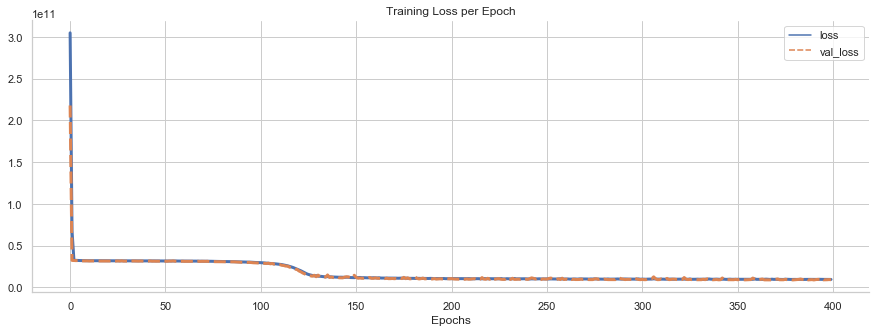

In [55]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [56]:
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.8542109645008341

Text(0.5, 1.0, 'Prediction with test features in Keras ANN')

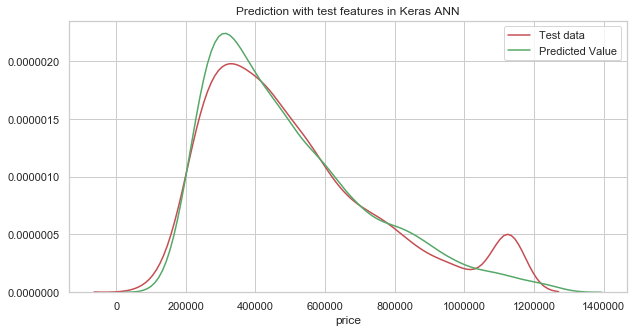

In [60]:
f,ax=plt.subplots(figsize=(10, 5))
ax=sns.distplot(y_test,hist=False,label='Test data',color='r')
sns.distplot(y_pred,hist=False,label='Predicted Value',color='g',ax=ax)
plt.title("Prediction with test features in Keras ANN") 

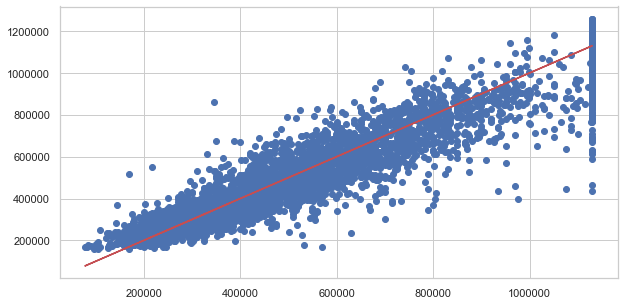

In [57]:
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')